In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split #imported only to split the train data into test and validation
from matplotlib.colors import ListedColormap
from math import sqrt
from math import exp
import matplotlib.patches as mpl_patches
import matplotlib.patches as Ellipse
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

##LDA

Percentage of variation captured in PCA1 and PCA2= [72.72745658-2.0854949e-30j 27.27254342-7.8205334e-31j]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


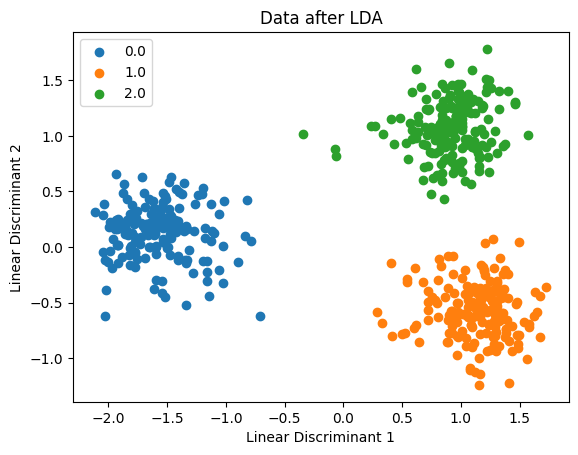

Percentage of variation captured in PCA1 and PCA2= [72.72745658+3.12824235e-30j 27.27254342+1.17308001e-30j]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


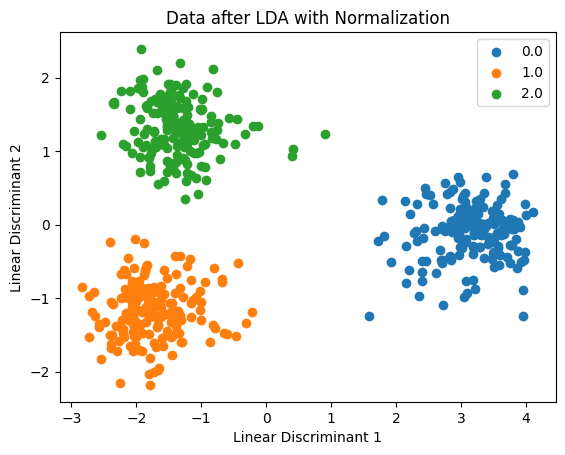

In [ ]:
def LDA(X,y,n_components):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[np.where(y == c)[0]]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)
        A = np.linalg.pinv(SW).dot(SB)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        LDA_index = np.argsort(abs(eigenvalues))[::-1]
        PCA_index=LDA_index[0:n_components]
        sorted_eigenvalue = eigenvalues[LDA_index]
        s=np.sum(sorted_eigenvalue)
        variation=eigenvalues[PCA_index]
        print("Percentage of variation captured in PCA1 and PCA2=",variation*100/s)
        eigenvalues = eigenvalues[LDA_index]
        eigenvectors = eigenvectors[LDA_index]
        linear_discriminants = eigenvectors[0 : n_components]
        return np.dot(X,linear_discriminants.T)

url = 'https://drive.google.com/file/d/16hvsn7jZ00AvwkIbQH2nhaBCWk0PGYEr/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path,sep='\t',header=None)
x = data.iloc[:,0:64]
X=x.to_numpy().reshape((537,64))
target = data.iloc[:,64]
y=target.to_numpy().reshape((537,1))
X_projected1= LDA(X, y,2)
X0=X_projected1[np.where(y == 0)[0]]
X1=X_projected1[np.where(y == 1)[0]]
X2=X_projected1[np.where(y == 2)[0]]
plt.scatter(X0[:,0],X0[:,1])
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.legend(labels=np.unique(y))
plt.title("Data after LDA")
plt.show()
x=StandardScaler().fit_transform(X)
X_projectedN= LDA(x, y,2)
X0=X_projectedN[np.where(y == 0)[0]]
X1=X_projectedN[np.where(y == 1)[0]]
X2=X_projectedN[np.where(y == 2)[0]]
plt.scatter(X0[:,0],X0[:,1])
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.legend(labels=np.unique(y))
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("Data after LDA with Normalization")
plt.show()

##PCA


In [ ]:
def PCA(data , axis_count):
    data_mean=np.mean(data,axis=0)
    data_mean_centred = data - data_mean
    cov_mat = np.cov(data_mean_centred , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    decending_index = np.argsort(eigen_values)[::-1]
    PCA_index=decending_index[0:axis_count]
    sorted_eigenvalue = eigen_values[decending_index]
    s=np.sum(sorted_eigenvalue)
    variation=eigen_values[PCA_index]
    print("Percentage of variation captured in PCA1 and PCA2=",variation*100/s)
    sorted_eigenvectors = eigen_vectors[:,decending_index][:,0:axis_count]
    data_reduced = np.dot(sorted_eigenvectors.transpose() , data_mean_centred.transpose() ).transpose()
    return data_reduced

Percentage of variation captured in PCA1 and PCA2= [31.48877948 18.55612949]


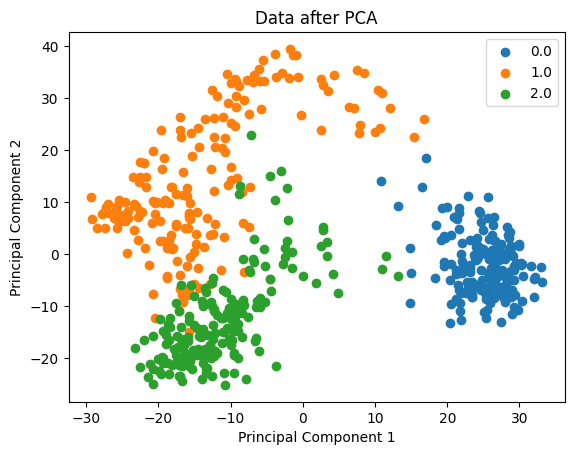

Percentage of variation captured in PCA1 and PCA2= [23.3674902  15.60325638]


Text(0.5, 1.0, 'Data after PCA with Normalization')

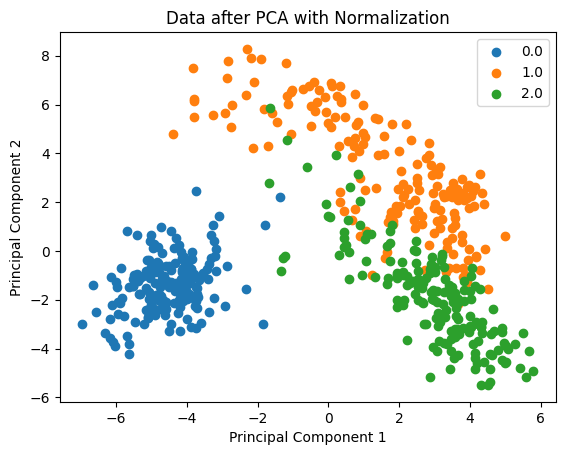

In [ ]:
url = 'https://drive.google.com/file/d/16hvsn7jZ00AvwkIbQH2nhaBCWk0PGYEr/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path,sep='\t',header=None)
x = data.iloc[:,0:64]
target = data.iloc[:,64]
target=target.to_numpy().reshape((537,1))
X_projected = PCA(x , 2)
X0=X_projected[np.where(y == 0)[0]]
X1=X_projected[np.where(y == 1)[0]]
X2=X_projected[np.where(y == 2)[0]]
plt.scatter(X0[:,0],X0[:,1])
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.legend(labels=np.unique(y))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('Data after PCA')
plt.show()
x=StandardScaler().fit_transform(x)
X_projected = PCA(x , 2)
X0=X_projected[np.where(y == 0)[0]]
X1=X_projected[np.where(y == 1)[0]]
X2=X_projected[np.where(y == 2)[0]]
plt.scatter(X0[:,0],X0[:,1])
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.legend(labels=np.unique(y))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('Data after PCA with Normalization')

##Bayes Classifier

In [ ]:
X_projectedN=np.real(X_projected1)
X_train, X_test, Y_train, Y_test = train_test_split(X_projectedN.reshape((537,2)),target, train_size=0.8)
X = X_train[:,0]
Y = X_train[:,1]
label = Y_train
points = np.append(X_train,Y_train,axis=1)
zeroes=np.array([[]])
ones=np.array([[]])
twos=np.array([[]])
for i in points:
  if i[2]==0:
    zeroes = np.append(zeroes,[i], axis=1)
  elif i[2]==1:
    ones=np.append(ones,[i],axis=1)
  elif i[2]==2:
    twos=np.append(twos,[i],axis=1)
zeroes=np.reshape(zeroes,(zeroes.shape[1]//3,3))
ones=np.reshape(ones,(ones.shape[1]//3,3))
twos=np.reshape(twos,(twos.shape[1]//3,3))

#calculating the parameters for prediction
def parameters(data):
  mean_1=np.mean(data[:,0])
  mean_2=np.mean(data[:,1])
  features=np.transpose(data[:,[0,1]])
  cov=np.cov(features)
  return(mean_1,mean_2,cov)

Xmean0,Ymean0,covzero=parameters(zeroes)
Xmean1,Ymean1,covone=parameters(ones)
Xmean2,Ymean2,covtwo=parameters(twos)

def prediction(x,mean_1,mean_2,cov):
  cov_det=np.linalg.det(cov)
  cov_inv=np.linalg.inv(cov)
  arr=np.array([mean_1,mean_2])
  x=np.array(x)
  meanarr=np.subtract(x,arr)
  z=np.matmul(np.matmul(meanarr,cov_inv),np.transpose(meanarr))
  prob=((1/((2*np.pi)*(cov_det**0.5)))*(np.exp(-z/2)))
  return(prob)

def pred_labels_2(X_test,cov1,cov2):
    pred=[]
    for i in X_test:
      if prediction(i,Xmean0,Ymean0,cov1)>prediction(i,Xmean1,Ymean1,cov2):
        pred+=[0]
        plt.scatter(i[0],i[1],c='green')
      else:
        pred+=[1]
        plt.scatter(i[0],i[1],c='yellow')
    plt.show()
    return(pred)

def accuracy(label_pred,label):
  count=0
  for i in range(len(label)):
    if label[i]==label_pred[i]:
      count+=1
  return(count*100/len(label))

x_min, x_max = np.round(X.min())-0.5, np.round(X.max()+0.5)
y_min, y_max = np.round(Y.min())-0.5, np.round(Y.max()+0.5)
x_axis_range = np.arange(x_min,x_max, 0.02)
y_axis_range = np.arange(y_min,y_max, 0.02)
xx, yy = np.meshgrid(x_axis_range, y_axis_range)
mesh_points = np.c_[xx.ravel(), yy.ravel()]

def confusion_matrix(true_labels, predicted_labels):
  matrix_dim = len(np.unique(true_labels))
  confusion_matrix = np.zeros((matrix_dim,matrix_dim))
  for i in range(len(predicted_labels)):
    a = int(predicted_labels[i])
    b = int(true_labels[i])
    confusion_matrix[a,b] = confusion_matrix[a,b]+1
  print(confusion_matrix)

def plot_ellipse(alpha,colorlines):
  for i, (mean, cov) in enumerate(zip(means, covariances)):
    eigvals, eigvecs = np.linalg.eigh(cov)
    major_axis = np.sqrt(eigvals[0]) * alpha
    minor_axis = np.sqrt(eigvals[1]) * alpha
    # Find the angle of rotation of the ellipse
    angle = np.arctan2(eigvecs[1,0], eigvecs[0,0]) * 180 / np.pi
    # Create the ellipse object
    ell1 = mpl_patches.Ellipse(mean, width=major_axis, height=minor_axis, angle=angle, fill=False, edgecolor=colorlines[i])
    plt.gca().add_artist(ell1)

100.0
[[143.   0.   0.]
 [  0. 147.   0.]
 [  0.   0. 139.]]
100.0
[[35.  0.  0.]
 [ 0. 35.  0.]
 [ 0.  0. 38.]]


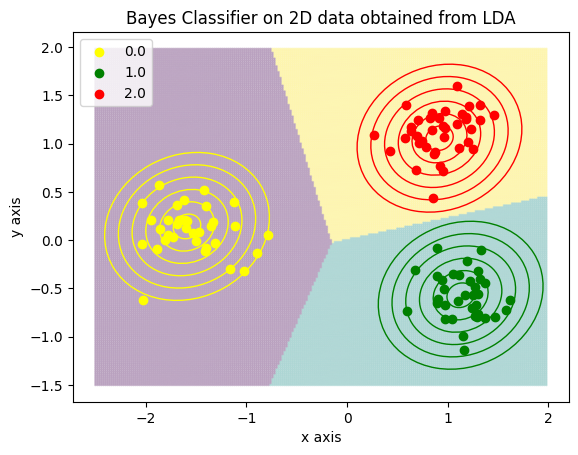

In [ ]:
#Q3

#train accuracy
pred_train=[]
for i in points[:,[0,1]]:
  p0=prediction(i,Xmean0,Ymean0,covtwo)
  p1=prediction(i,Xmean1,Ymean1,covtwo)
  p2=prediction(i,Xmean2,Ymean2,covtwo)

  if p0>p1 and p0>p2:
    pred_train+=[0]
  elif p1>p0 and p1>p2:
    pred_train+=[1]
  else:
    pred_train+=[2]
print(accuracy(pred_train,points[:,2]))
confusion_matrix(points[:,2],pred_train)

#Print decision boundary
mesh_pred = []
for i in mesh_points:
  p0=prediction(i,Xmean0,Ymean0,covtwo)
  p1=prediction(i,Xmean1,Ymean1,covtwo)
  p2=prediction(i,Xmean2,Ymean2,covtwo)
  #print(p0,p1,p2,p0>p1)
  if p0>p1 and p0>p2:
    mesh_pred+=[0]
  elif p1>p0 and p1>p2:
    mesh_pred+=[1]
  else:
    mesh_pred+=[2]
#print(mesh_pred)
plt.scatter(mesh_points[:,0],mesh_points[:,1], c=mesh_pred, s=1, alpha = 0.2)

#test accuracy
pred=[]
tx0=[]
ty0=[]
tx1=[]
ty1=[]
tx2=[]
ty2=[]
for i in X_test:
  p0=prediction(i,Xmean0,Ymean0,covtwo)
  p1=prediction(i,Xmean1,Ymean1,covtwo)
  p2=prediction(i,Xmean2,Ymean2,covtwo)

  if p0>p1 and p0>p2:
      tx0+=[i[0]]
      ty0+=[i[1]]
      pred+=[0]
  elif p1>p0 and p1>p2:
      tx1+=[i[0]]
      ty1+=[i[1]]
      pred+=[1]
  else:
      tx2+=[i[0]]
      ty2+=[i[1]]
      pred+=[2]

plt.scatter(tx0,ty0,c='yellow',label='0.0')
plt.scatter(tx1,ty1,c='green',label='1.0')
plt.scatter(tx2,ty2,c='red',label='2.0')
print(accuracy(pred,Y_test))
confusion_matrix(Y_test,pred)

#Plotting the contour ellipses
means = np.array([[Xmean0, Ymean0],[Xmean1, Ymean1],[Xmean2,Ymean2]])
covariances = np.array([covtwo,covtwo,covtwo])
ellipse_range = np.arange(1,7,1)
for i in ellipse_range:
  plot_ellipse(i,['yellow','green','red'])
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.title("Bayes Classifier on 2D data obtained from LDA")
plt.show()